In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.externals import joblib
import requests

sns.set()
%matplotlib inline


# fetch data
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS37MqRL0SL1twLDjX5vFw-WqICPgBW0ev_4KMR2kzzcMAWkKNQo_wnbr_QqcXXuFgBXX8K-Amogx-9/pub?output=csv")

# split data set into training set and test-set

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

df_copy = train_set.copy()

df_copy.describe()





,engine_size,hwy_mpg
count,159.000000,159.000000
mean,123.119497,31.062893
std,39.642607,6.826684
min,61.000000,16.000000
25%,97.000000,25.000000
50%,110.000000,31.000000
75%,140.000000,36.000000
max,326.000000,54.000000


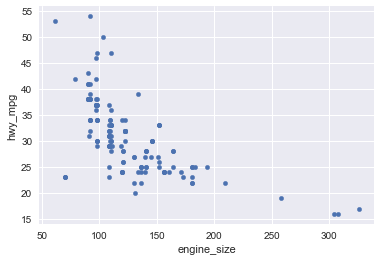

In [5]:
# Scatter plot
df_copy.plot.scatter(x='engine_size', y= 'hwy_mpg')

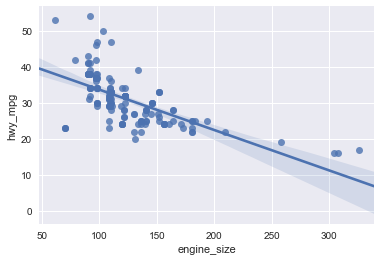

In [25]:
# Regression Plot
sns.regplot('engine_size', 'hwy_mpg', data = df_copy)

In [ ]:
# This still needs to be fixed
test_set_full = test_set.copy()
test_set = test_set.drop(["hwy_mpg"], axis=1)
test_set.head()

In [45]:
# Build model
train_labels=df_copy['hwy_mpg']
train_labels.head()


183    29
38     33
24     38
142    29
141    31
Name: hwy_mpg, dtype: int64

In [ ]:
# This still needs to be fixed
train_set_full = train_set.copy()
train_set = train_set.drop(["hwy_mpg"], axis=1)
train_set.head()

In [10]:
# linear Regression Equation
lin_reg = LinearRegression()

lin_reg.fit(train_set, train_labels)
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

('Coefficients: ', array([-0.11204949]))
('Intercept: ', 44.858370288206217)


In [34]:
# Predicted values from test_set
hwy_mpg_pred = lin_reg.predict(test_set)
print(hwy_mpg_pred)
print(test_set_full["hwy_mpg"])

[ 31.18833214  21.44002624  27.82684735  32.64497555  33.87751997
  28.4991443   18.63878892  24.35331306  31.18833214  25.69790698
  33.98956946  34.54981693  24.35331306  34.54981693  33.98956946
  32.53292605  35.89441084  31.18833214  33.98956946  33.87751997
  21.44002624  23.12076864  31.41243112  25.69790698  24.35331306
  29.05939177  34.54981693  32.75702504  34.77391591  31.30038163
  29.05939177  15.94960108  30.29193619  28.4991443   24.57741205
  18.63878892  31.30038163  23.12076864  34.54981693  31.18833214]
82     32
15     22
111    25
177    34
76     30
163    30
68     18
67     25
120    30
173    24
176    46
148    32
65     25
30     38
86     37
85     30
55     23
60     42
90     37
159    29
16     20
124    25
96     34
172    24
66     25
189    28
147    37
9      29
18     43
128    28
190    28
45     19
192    22
164    30
101    25
69     18
126    28
123    25
75     38
78     32
Name: hwy_mpg, dtype: int64


In [20]:
# r square value
lin_reg.score(test_set, test_set_full["hwy_mpg"])

0.58483544173847346

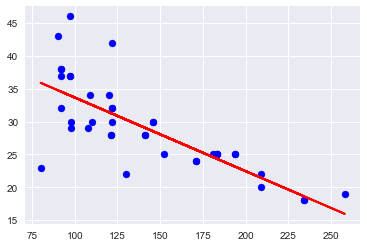

In [33]:
# Scatter Plot and line plot for test_set and predicted hwy_mpg
plt.scatter(test_set_full["engine_size"], test_set_full["hwy_mpg"], color='blue')
plt.plot(test_set_full["engine_size"], hwy_mpg_pred, color='red', linewidth=2)

In [15]:
BASE_URL = "http://localhost:5000"

joblib.dump(lin_reg, "linear_regression_model.pkl")

joblib.dump(train_set, "training_data.pkl")
joblib.dump(train_labels, "training_labels.pkl")

['training_labels.pkl']